In [4]:
#let load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.utils import shuffle

In [5]:
#loading dataset to pandas dataframe
human = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\New folder\Human Activity Recognisation.csv")

In [6]:
human.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [8]:
human.shape

(2947, 563)

In [9]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [10]:
human.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [11]:
human.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
human.isnull().sum().values.any()

False

In [13]:
human['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

## Data Visualization

In [14]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(12,9)})

<AxesSubplot:xlabel='Activity', ylabel='count'>

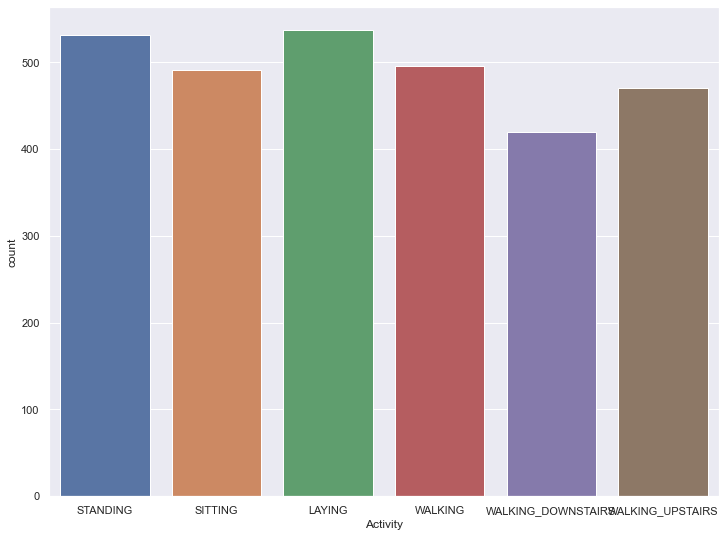

In [15]:
sns.countplot(data=human,x='Activity')

<AxesSubplot:xlabel='Activity', ylabel='subject'>

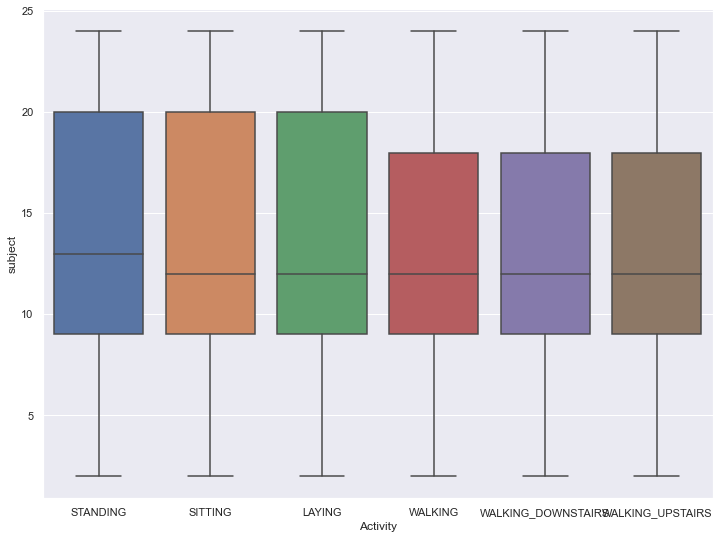

In [18]:
sns.boxplot(data=human,x='Activity',y='subject')

## Lable Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encode = LabelEncoder()

In [25]:
labels = label_encode.fit_transform(human.Activity)

In [26]:
human['Target']=labels

In [28]:
human['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [29]:
human['Target'].value_counts()

0    537
2    532
3    496
1    491
5    471
4    420
Name: Target, dtype: int64

## Separting features & target

In [31]:
X = human.drop(columns=['Activity','subject','Target'],axis=1)
Y = human['Target']

In [32]:
print(X)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958 

In [33]:
print(Y)

0       2
1       2
2       2
3       2
4       2
       ..
2942    5
2943    5
2944    5
2945    5
2946    5
Name: Target, Length: 2947, dtype: int32


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(2947, 561) (2357, 561) (590, 561)


In [43]:
print(human.std())

tBodyAcc-mean()-X       0.060570
tBodyAcc-mean()-Y       0.025745
tBodyAcc-mean()-Z       0.042747
tBodyAcc-std()-X        0.412597
tBodyAcc-std()-Y        0.494269
                          ...   
angle(X,gravityMean)    0.509205
angle(Y,gravityMean)    0.324300
angle(Z,gravityMean)    0.241467
subject                 6.950984
Target                  1.706414
Length: 563, dtype: float64


## Standarizing the data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train_standardize = scaler.transform(X_train)

X_test_standardize = scaler.transform(X_test)

In [48]:
print(X_train_standardize)

[[-0.01394309 -1.92984736 -0.19394648 ... -0.54060553  0.47936145
   0.00955529]
 [ 0.50976827  0.01361783  0.12791759 ...  1.97712659 -1.95293915
  -1.60039629]
 [ 1.66332195 -0.37437888  0.39205602 ... -0.62268855  0.25421576
   0.71314522]
 ...
 [ 1.72500124  1.79497582  4.39734817 ... -0.40893513  0.45654093
   0.90099971]
 [ 0.0985371  -0.06368601  0.05077394 ... -0.31635224 -0.52731952
  -0.22574034]
 [-0.36918048  1.3633345  -0.2717806  ... -0.38230563  0.44933578
   0.96117626]]


In [49]:
print(X_test_standardize)

[[ 0.59367227 -0.28912539 -0.37833268 ... -0.327768    0.74969901
   0.22015553]
 [-0.4250944  -0.12667815  0.18999113 ...  2.15480527 -1.50590613
  -2.25547933]
 [ 0.02712319 -0.0299274   0.11355123 ...  1.95029346 -1.95377108
  -1.59087734]
 ...
 [ 0.04414864  0.06861589  0.06693345 ... -0.43228248 -0.49202656
   0.10934289]
 [ 0.30545832  0.17457914  0.22067818 ... -0.60833497  0.29528629
   0.700087  ]
 [-0.70392785 -2.44464074 -2.17800468 ... -0.63241142  0.3545136
   0.56332121]]


## HyperParameter tuning using Gridsearch & cross validation

In [50]:
model = SVC()

In [54]:
parameters={'kernel':['rbf'],
           'gamma':[1e-3,1e-4],
           'C':[1,10,100,1000]}


In [55]:
classifier = GridSearchCV(model,parameters,cv=5)

In [56]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [57]:
classifier.cv_results_

{'mean_fit_time': array([0.45881906, 0.9861177 , 0.23681636, 0.42931638, 0.13459616,
        0.24006987, 0.14539533, 0.14219418]),
 'std_fit_time': array([0.03081138, 0.03787414, 0.0285959 , 0.02501881, 0.00565225,
        0.04768599, 0.02175569, 0.01741008]),
 'mean_score_time': array([0.49834533, 0.71690149, 0.2338932 , 0.49218068, 0.11978369,
        0.21389689, 0.09868383, 0.11528292]),
 'std_score_time': array([0.02300074, 0.03951052, 0.0207778 , 0.02632351, 0.0085171 ,
        0.03450867, 0.00542282, 0.00404561]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001, 0.001,
                    0.0001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(da

In [58]:
#best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [59]:
#highest accuracy 
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9355333659463037


In [60]:
#loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [61]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.458819,0.030811,0.498345,0.023001,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.923729,0.847458,0.911715,0.874363,0.935484,0.898550,0.032762,6
1,0.986118,0.037874,0.716901,0.039511,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.586441,0.574576,0.550085,0.646859,0.551783,0.581949,0.035251,8
2,0.236816,0.028596,0.233893,0.020778,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.971186,0.872881,0.942275,0.911715,0.952462,0.930104,0.034492,4
3,0.429316,0.025019,0.492181,0.026324,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.925424,0.849153,0.911715,0.874363,0.932088,0.898549,0.031766,7
4,0.134596,0.005652,0.119784,0.008517,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.981356,0.872881,0.947368,0.933786,0.942275,0.935533,0.035252,1


In [62]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [63]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,rbf,0.898550
1,1,rbf,0.581949
2,10,rbf,0.930104
3,10,rbf,0.898549
4,100,rbf,0.935533
5,100,rbf,0.929426
6,1000,rbf,0.931803
7,1000,rbf,0.933497


In [67]:
svm_model = GridSearchCV(SVC(), parameters, cv=5)
svm_model.fit(X_train_standardize, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [68]:
svm_model = GridSearchCV(SVC(), parameters, cv=5)
svm_model.fit(X_test_standardize, Y_test)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [76]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_standardize)
Y_pred_label = list(label_encode.inverse_transform(Y_pred))

Best score for training data: 0.9508474576271186 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.001 

